In [6]:
import numpy as np 
import matplotlib.pyplot as plt 


from numba import jit 



Change the the range, according to your probability function properly: 

(array([ 92.,  99.,  90.,  88.,  94., 110., 110.,  99., 111., 107.]),
 array([-1.49939980e+02, -1.19953562e+02, -8.99671433e+01, -5.99807249e+01,
        -2.99943066e+01, -7.88817459e-03,  2.99785302e+01,  5.99649486e+01,
         8.99513670e+01,  1.19937785e+02,  1.49924204e+02]),
 <BarContainer object of 10 artists>)

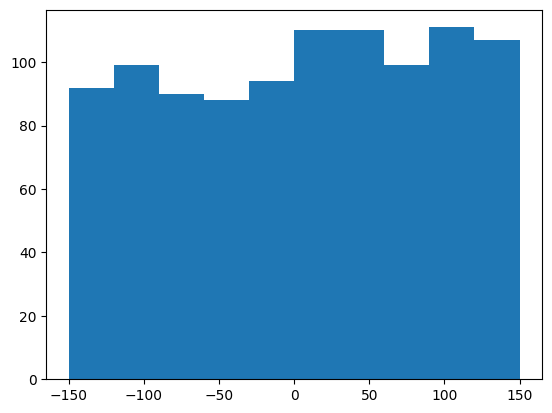

In [7]:
numberOfSamples = 1000


samples = np.random.uniform(-150, 150, numberOfSamples)

plt.hist(samples)

In [8]:
# @jit(nopython = True) 
# def probabilityFunction(x): 
#     return np.exp(-x**2/2)




@jit(nopython = True)
def probabilityFunction(x): 
    '''
    Quadratic probability
    '''
    centerX = 50 
    
    return  (x- centerX)**2  




# @jit(nopython = True)
# def probabilityFunction(x): 
#     return x**3 


# @jit(nopython = True)
# def probabilityFunction(x): 
#     return x+ 10

In [10]:
delta = 0.5



numberOfIterations = 80000 

@jit(nopython = True)
def metropolisHastings(samples, numberOfIterations): 
    
    for i in range(numberOfIterations): 

        for index, sample in zip(list(range(len(samples))), samples): 

            deltai = np.random.uniform(-delta, delta)

            x_trial = sample + deltai 

            w = probabilityFunction(x_trial)/probabilityFunction(sample) 

            # accept or reject 
            if w >= 1: 
                samples[index] = x_trial 
            elif w<1: 
                r = np.random.random()
                if r <= w: 
                    samples[index] = x_trial 



metropolisHastings(samples, numberOfIterations)

In [ ]:
plt.hist(samples, bins = 3000); 

In [ ]:
samples.var()

In [ ]:
samples.var()

# Comparison to mathematica 

## Quadratic 

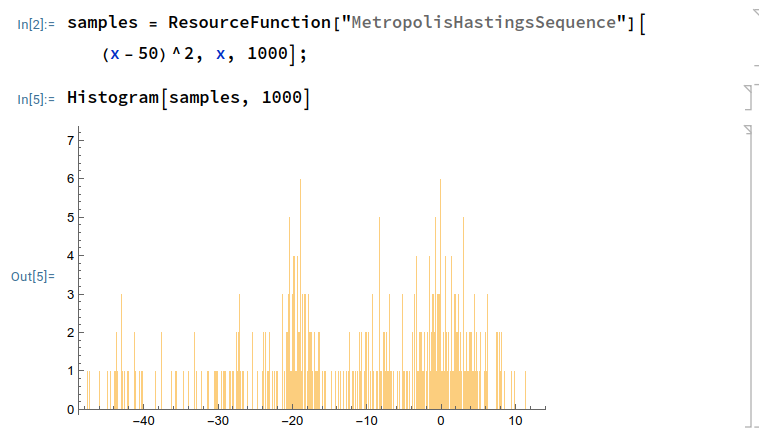